In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pylab as plt
from sklearn.model_selection import train_test_split
import os
import cv2
from keras.utils import to_categorical

## 构建并训练模型

In [2]:
MODEL_SAVE_PATH = "handwrite_shape_classifier.h5"

In [3]:
def pre_process(images):
    images = np.array(images)
    images = images.astype('float32')
    images /=255
    return images

In [4]:
dataset_dir = "./dataset/shapes/"
folders = ["circles", "squares", "triangles"]
labels = []
images = []
for folder in folders:
    print(folder)
    shape_folder_dir = os.path.join(dataset_dir, folder)
    for img_file_name in os.listdir(shape_folder_dir):
        img_file_path = os.path.join(shape_folder_dir, img_file_name)
        image = cv2.imread(img_file_path, 0)
        image = cv2.resize(image, (28, 28))
        images.append(image)
        labels.append(folders.index(folder))

# 分割成训练集和测试集
train_images, test_images, train_labels, test_labels = train_test_split(images, labels, test_size=0.2, random_state=42)

#preprocess data
train_data  = pre_process(train_images)
test_data = pre_process(test_images)
print(train_data.shape)
print(test_data.shape)

#change labels to categorical
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)
train_labels_one_hot = to_categorical(train_labels)
test_labels_one_hot = to_categorical(test_labels)

#determine the number of classes
nClasses  = len(folders)

circles
squares
triangles
(240, 28, 28)
(60, 28, 28)


(240, 28, 28, 1)
xtrain_subset1 (12, 28, 28)
xtrain_subset2 (12, 28, 28, 1)


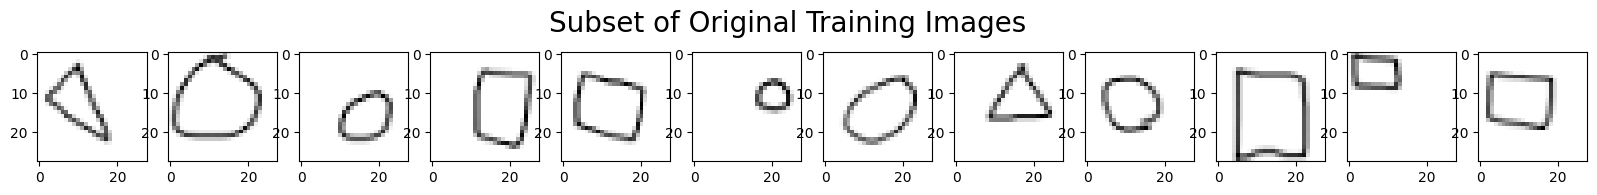

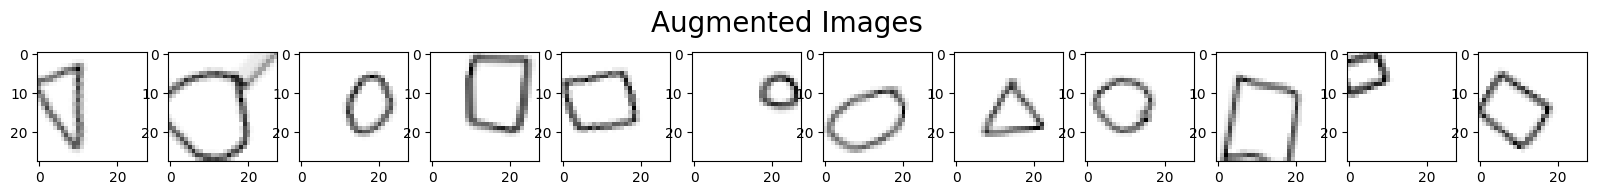

In [5]:
train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)

image_gen_train = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=45,
    width_shift_range=.15,
    height_shift_range=.15,
    horizontal_flip=False,
    zoom_range=0.1,
)
image_gen_train.fit(train_data)
print(train_data.shape)


x_train_subset1 = np.squeeze(train_data[:12])
print("xtrain_subset1",x_train_subset1.shape)
x_train_subset2 = train_data[:12]  # 一次显示12张图片
print("xtrain_subset2",x_train_subset2.shape)

fig = plt.figure(figsize=(20, 2))
plt.set_cmap('gray')
# 显示原始图片
for i in range(0, len(x_train_subset1)):
    ax = fig.add_subplot(1, 12, i + 1)
    ax.imshow(x_train_subset1[i])
fig.suptitle('Subset of Original Training Images', fontsize=20) # 总标题
plt.show()


# 显示增强后的图片
fig = plt.figure(figsize=(20, 2))
# .flow函数可以在给定的numpy数据集无限循环返回batch数据
for x_batch in image_gen_train.flow(x_train_subset2, batch_size=12, shuffle=False):
    for i in range(0, 12):
        ax = fig.add_subplot(1, 12, i + 1)
        ax.imshow(np.squeeze(x_batch[i]))
    fig.suptitle('Augmented Images', fontsize=20)# 总标题
    plt.show()
    break;

In [6]:
# 构建网络
# 构造CNN网络模型
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(nClasses, activation=tf.nn.softmax),
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [12]:
# train_data = train_data.reshape(train_data.shape[0], 28, 28, 1)
# 编译并训练模型
model.compile(optimizer=tf.optimizers.Adam(), loss='categorical_crossentropy', metrics=['accuracy'])
history = model.fit(
    image_gen_train.flow(train_data, train_labels_one_hot, batch_size=32),
    epochs=200, 
    verbose=1,
    validation_data=(test_data, test_labels_one_hot)
)

Epoch 1/200
8/8 [==============================] - 1s 52ms/step - loss: 0.2412 - accuracy: 0.9167 - val_loss: 0.1691 - val_accuracy: 0.9500
Epoch 2/200
8/8 [==============================] - 0s 29ms/step - loss: 0.2441 - accuracy: 0.9125 - val_loss: 0.2298 - val_accuracy: 0.9333
Epoch 3/200
8/8 [==============================] - 0s 28ms/step - loss: 0.2886 - accuracy: 0.8833 - val_loss: 0.2892 - val_accuracy: 0.9000
Epoch 4/200
8/8 [==============================] - 0s 28ms/step - loss: 0.2589 - accuracy: 0.9042 - val_loss: 0.2173 - val_accuracy: 0.9333
Epoch 5/200
8/8 [==============================] - 0s 29ms/step - loss: 0.2829 - accuracy: 0.8875 - val_loss: 0.1856 - val_accuracy: 0.9333
Epoch 6/200
8/8 [==============================] - 0s 28ms/step - loss: 0.2220 - accuracy: 0.9208 - val_loss: 0.2345 - val_accuracy: 0.9333
Epoch 7/200
8/8 [==============================] - 0s 39ms/step - loss: 0.2053 - accuracy: 0.9167 - val_loss: 0.2087 - val_accuracy: 0.9500
Epoch 8/200
8/8 [===

In [13]:
# 评估模型
model.evaluate(test_data, test_labels_one_hot)

2/2 [==============================] - 0s 10ms/step - loss: 0.2906 - accuracy: 0.9167


[0.29058969020843506, 0.9166666865348816]

In [16]:
# 保存模型
model.save(MODEL_SAVE_PATH)

## 测试模型

In [3]:
# 测试模型
model = tf.keras.models.load_model(MODEL_SAVE_PATH)

In [ ]:
img_idx = 20
test_image = test_images[img_idx]
plt.imshow(test_image)
test_image = test_image[None]
preds = model.predict(test_image)
lb_idx = np.argmax(preds)
label = folders[lb_idx]
print("{}: {:.2f}%".format(label, preds[0][lb_idx] * 100))
print("real: ", folders[test_labels[img_idx]])

1/1 [==============================] - 0s 22ms/step
triangles: 100.00%


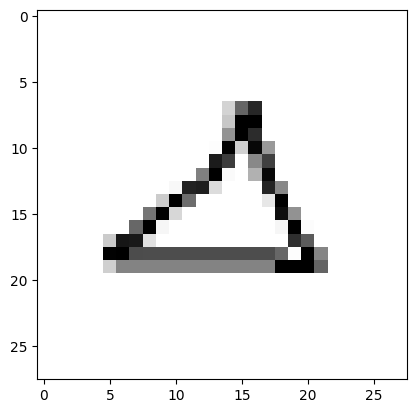

In [10]:
folders = ["circles", "squares", "triangles"]

image = cv2.imread("./dataset/exts/draw/triangle.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image = cv2.resize(image, (28, 28))
plt.imshow(image)
image = image / 255
image = image[None]
preds = model.predict(image)
lb_idx = np.argmax(preds)
label = folders[lb_idx]
print("{}: {:.2f}%".format(label, preds[0][lb_idx] * 100))